<a href="https://colab.research.google.com/github/hyanquiv/Fisica-Computacional/blob/main/Practica_Laboratorio_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

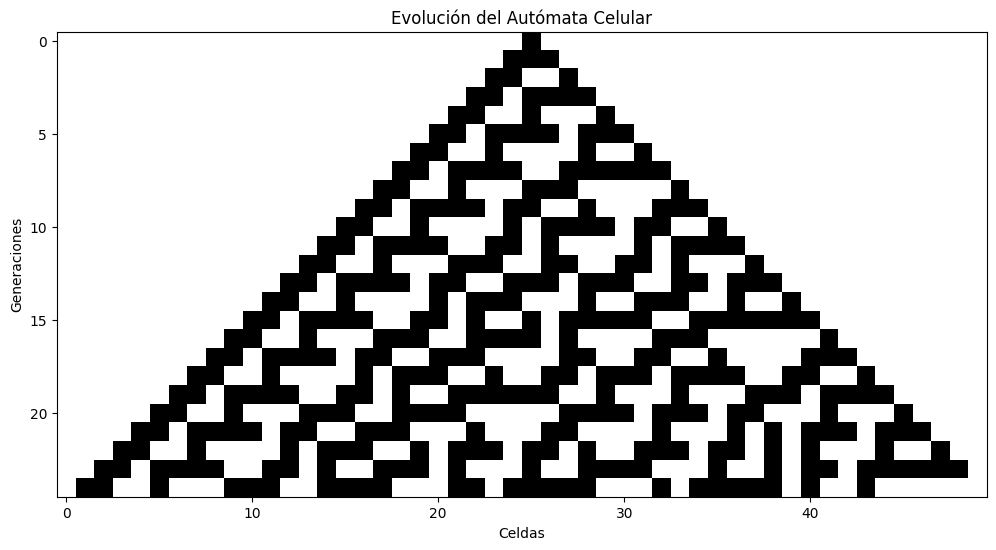

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las reglas según tu tabla
def calcular_nueva_celda(izquierda, actual, derecha):
    if izquierda == 1 and actual == 1 and derecha == 1: return 0
    if izquierda == 1 and actual == 1 and derecha == 0: return 0
    if izquierda == 1 and actual == 0 and derecha == 1: return 0
    if izquierda == 1 and actual == 0 and derecha == 0: return 1
    if izquierda == 0 and actual == 1 and derecha == 1: return 1
    if izquierda == 0 and actual == 1 and derecha == 0: return 1
    if izquierda == 0 and actual == 0 and derecha == 1: return 1
    if izquierda == 0 and actual == 0 and derecha == 0: return 0

# Genera la evolución del autómata
def automata_celular(tamaño, generaciones, semilla=None):
    # Inicializa el estado inicial
    if semilla:
        np.random.seed(semilla)
    celdas = np.zeros((generaciones, tamaño), dtype=int)
    celdas[0, tamaño // 2] = 1  # Configuración inicial, una celda activa en el centro

    # Itera sobre las generaciones
    for t in range(1, generaciones):
        for i in range(1, tamaño - 1):  # Evita los bordes
            izquierda = celdas[t-1, i-1]
            actual = celdas[t-1, i]
            derecha = celdas[t-1, i+1]
            celdas[t, i] = calcular_nueva_celda(izquierda, actual, derecha)

    return celdas

# Visualiza el autómata
def graficar_automata(celdas):
    plt.figure(figsize=(12, 8))
    plt.imshow(celdas, cmap="binary", interpolation="nearest")
    plt.title("Evolución del Autómata Celular")
    plt.xlabel("Celdas")
    plt.ylabel("Generaciones")
    plt.show()

# Parámetros del autómata
tamaño = 50  # Número de celdas
generaciones = 25  # Número de generaciones
semilla = 42  # Para reproducir los resultados

# Ejecuta el autómata y grafica los resultados
celdas = automata_celular(tamaño, generaciones, semilla)
graficar_automata(celdas)
